In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
mexico = gpd.read_file("ShapeFiles/mexico.shp", encoding = "ISO-8859-1").sort_values(by="cve_ent")[['cve_ent','nom_ent','geometry']]
mexico['cve_ent'] = mexico['cve_ent'].astype(int)

In [159]:
defunciones = pd.read_excel("Graficos.xlsx",sheet_name="Defunciones por Estado")
dias = defunciones.filter(like = "2020").columns.tolist() + defunciones.filter(like = "2021").columns.tolist()
defunciones = pd.DataFrame(pd.concat((defunciones[['cve_ent', 'nombre']],defunciones[dias].sum(axis = 1)/defunciones['poblacion']*100000),axis=1)).rename(columns={'nombre':'estado', 0:'defunciones'}).sort_values(by="cve_ent")
gdf_def = gpd.GeoDataFrame(defunciones.merge(mexico,how='left',on ='cve_ent'))


In [160]:
casos = pd.read_excel("Graficos.xlsx",sheet_name="Casos por Estado")
dias = casos.filter(like = "2020").columns.tolist() + casos.filter(like = "2021").columns.tolist()
casos = pd.DataFrame(pd.concat((casos[['cve_ent','nombre']],casos[dias].sum(axis = 1)/casos['poblacion']*100000),axis=1)).rename(columns={'nombre':'estado', 0:'casos'}).sort_values(by="cve_ent")
gdf_casos = gpd.GeoDataFrame(casos.merge(mexico,how='left',on ='cve_ent'))

In [189]:
desigualdad = pd.read_excel("Graficos.xlsx",sheet_name="Desigualdad Nacional").drop(['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],axis=1).head(32)
gdf_desigualdad = gpd.GeoDataFrame(gini.merge(mexico,how='left',on ='cve_ent'))

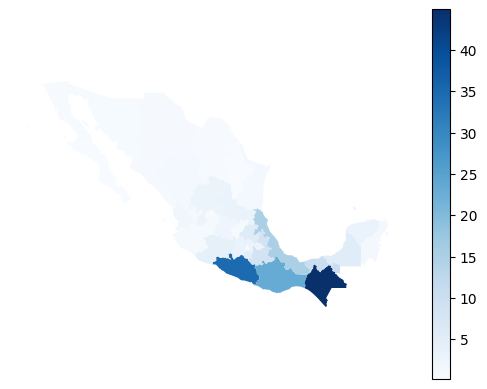

In [207]:
gdf_desigualdad.plot(column = "RI 2018",cmap = "Blues",legend= True)
plt.axis('off')
plt.savefig('Mapas/RI2018.png')

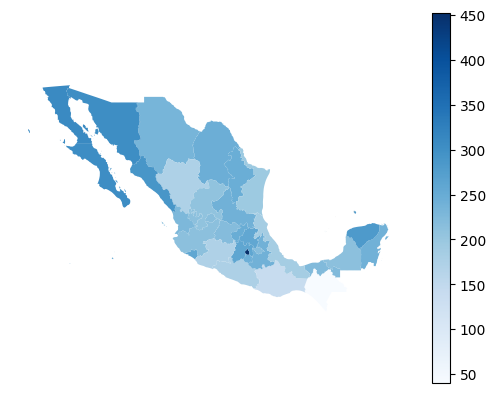

In [208]:
gdf_def.plot(column = "defunciones",cmap = "Blues",legend= True)
plt.axis('off')
plt.savefig('Mapas/defunciones.png')

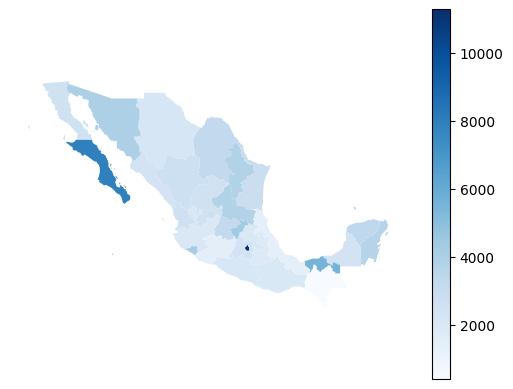

In [209]:
gdf_casos.plot(column = "casos",cmap = "Blues",legend= True)
plt.axis('off')
plt.savefig('Mapas/casos.png')